In [3]:
!pip install rdkit-pypi torch torchvision pandas matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 49.8 MB/s eta 0:00:00


In [1]:
import pandas as pd

# Define the existing data (first 100 entries)
data = {
    "Iteration": list(range(1, 299)),
    "Active_fraction": [
        # First 100 values
        0.0, 0.0, 0.0, 0.0015797789, 0.00063191156, 0.001610306, 0.0009852217,
        0.0034591195, 0.0, 0.0, 0.0, 0.0, 0.00063593005, 0.0, 0.00032467532,
        0.0, 0.0, 0.0, 0.0, 0.0, 0.0015128592, 0.0, 0.0005961252, 0.0, 0.0,
        0.0, 0.0, 0.00155521, 0.0, 0.0, 0.0, 0.0015503876, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.0, 0.0, 0.0005738881, 0.0, 0.0, 0.0, 0.0, 0.0002805049,
        0.0, 0.0, 0.0, 0.0, 0.0014326648, 0.0, 0.0, 0.0, 0.0, 0.0014641288,
        0.0, 0.0, 0.0, 0.0, 0.0012232416, 0.0, 0.0, 0.000896861, 0.0,
        0.00059970014, 0.0, 0.0, 0.0, 0.002739726, 0.0014209591, 0.0018518518,
        0.0036231885, 0.0018083183, 0.0047524753, 0.006690141, 0.013095237,
        0.009465021, 0.009016394, 0.010526315, 0.007434944, 0.012830189,
        0.007827789, 0.003960396, 0.0060362173, 0.009643606, 0.0074226805,
        0.021559631, 0.02206235, 0.02948718, 0.034177218, 0.029831933,
        0.04474273, 0.03291667, 0.05882353, 0.056837607, 0.03915094,
        0.09342404, 0.099781185, 0.11298701,
        # Next 100 values
        0.1447983, 0.11775281, 0.17004609, 0.19383885, 0.24869975, 0.24508928,
        0.2716279, 0.2829897, 0.2973684, 0.30459183, 0.37008798, 0.37682927,
        0.42542955, 0.3677419, 0.4458182, 0.4478261, 0.4735294, 0.50173414,
        0.4345679, 0.4695122, 0.45801526, 0.37818182, 0.52093023, 0.5509804,
        0.5578947, 0.47428575, 0.5705263, 0.5326087, 0.5434343, 0.47157893,
        0.51827955, 0.44827586, 0.4582278, 0.50793654, 0.564557, 0.5292308,
        0.50508475, 0.49859157, 0.542029, 0.59999996, 0.562963, 0.6785714,
        0.625, 0.4779661, 0.53846157, 0.5655173, 0.530303, 0.5541667,
        0.6528302, 0.5659574, 0.5627907, 0.5709678, 0.59999996, 0.7130436,
        0.67777777, 0.6162162, 0.54090905, 0.5541667, 0.5921569, 0.62083334,
        0.55, 0.6727273, 0.58857137, 0.65555555, 0.6047619, 0.75135136,
        0.6097561, 0.5395349, 0.7517241, 0.67741936, 0.6047619, 0.6296296,
        0.6, 0.5944445, 0.6944444, 0.6615384, 0.63, 0.6333334, 0.62352943,
        0.65599996, 0.78125, 0.55714285, 0.67741936, 0.59999996, 0.6648649,
        0.63846153, 0.6114286, 0.5125, 0.6580645, 0.59999996, 0.56363636,
        0.7310345, 0.72, 0.62068963, 0.74615383, 0.68, 0.59310347, 0.6181818,
        0.6097561, 0.67826086, 0.57575756, 0.6461538, 0.67333335, 0.54857147, 0.6740741, 0.6066667,
        0.58571434, 0.79230773, 0.6333333, 0.75, 0.8526316, 0.648, 0.6545454,
        0.81904763, 0.69655174, 0.73636365, 0.85714287, 0.71999997,
        0.8230769, 0.6785714, 0.6962963, 0.74444443, 0.85333335, 0.8,
        0.7222222, 0.6666667, 0.62857145, 0.74, 0.6583333, 0.6583333,
        0.67200005, 0.64444447, 0.7047619, 0.57272726, 0.72, 0.7777778,
        0.568, 0.672, 0.64, 0.64, 0.8375, 0.69, 0.7368421, 0.81176466,
        0.71304345, 0.74285716, 0.62352943, 0.66315794, 0.7125, 0.6857143,
        0.65000004, 0.68888885, 0.6761905, 0.876923, 0.58947366, 0.5466667,
        0.8333333, 0.76666665, 0.6636364, 0.70666665, 0.70000005, 0.93333334,
        0.8, 0.7428571, 0.7647059, 0.6181818, 0.6588235, 0.75555557,
        0.7647059, 0.78571427, 0.74545455, 0.78095233, 0.92, 0.7411765,
        0.72380954, 0.7714286, 0.68, 0.58181816, 0.6666667, 0.6090909,
        0.7125, 0.78571427, 0.75555557, 0.7714286, 0.8666667, 0.73846155,
        0.875, 0.9818182, 0.87272733, 0.68, 0.70000005, 0.7, 0.6952381,
        0.64285713, 0.67777777, 0.8352941, 0.768421, 0.8
    ],
    "Valid_fraction": [
        # First 100 values
        0.7826633165829145, 0.7735849056603774, 0.8120300751879699,

        0.793233082706767, 0.793233082706767, 0.7781954887218046, 0.76125,

        0.7959949937421777, 0.8105395232120451, 0.8005018820577164,

        0.8080301129234629, 0.7809762202753442, 0.7882205513784462,

        0.7816813048933501, 0.7709637046307884, 0.7484355444305382,

        0.7716436637390214, 0.7875, 0.7917189460476788, 0.7959949937421777,

        0.80375, 0.8293601003764115, 0.8297872340425532, 0.83875, 0.8435544430538173,

        0.82375, 0.8020050125313283, 0.8210262828535669, 0.804755944931164,

        0.8197747183979975, 0.8057644110275689, 0.8103015075376885,

        0.8264150943396227, 0.8368883312421581, 0.853566958698373,

        0.8870765370138017, 0.871859296482412, 0.853566958698373, 0.8325,

        0.8723404255319149, 0.885, 0.85625, 0.8853904282115869, 0.9133165829145728,

        0.918444165621079, 0.9042821158690176, 0.8946047678795483, 0.9082914572864321,

        0.9096612296110415, 0.9146800501882058, 0.8735919899874843, 0.8884711779448622,

        0.8571428571428571, 0.8782936010037641, 0.8836045056320401,

        0.8621553884711779, 0.8569636135508155, 0.8085106382978723, 0.8275,

        0.8375, 0.818523153942428, 0.8406524466750314, 0.8295739348370927,

        0.83729662077597, 0.82625, 0.8347934918648311, 0.825, 0.845,

        0.7556390977443609, 0.73, 0.704630788485607, 0.6758448060075094,

        0.6943396226415094, 0.69125, 0.6320400500625782, 0.71, 0.6307884856070087,

        0.6090225563909775, 0.6146095717884131, 0.6190476190476191,

        0.6741854636591479, 0.6633291614518148, 0.6403508771929824,

        0.6320400500625782, 0.6220275344180225, 0.5977443609022557,

        0.6070087609511889, 0.545, 0.5219023779724656, 0.5857321652065082,

        0.5932415519399249, 0.595, 0.55875, 0.6, 0.5525, 0.5857321652065082,

        0.53, 0.55125, 0.57125, 0.5775, 0.58875, 0.55625, 0.5425, 0.5281602002503129, 0.5294117647058824,
        0.56, 0.5375, 0.4856070087609512, 0.475, 0.49, 0.42625, 0.41,
        0.36375, 0.31, 0.34375, 0.2875, 0.2553191489361702,
        0.2165206508135169, 0.2025, 0.205, 0.16375, 0.20625, 0.16125,
        0.1275, 0.1425, 0.13125, 0.11875, 0.11514392991239049,
        0.12375, 0.11875, 0.11625, 0.10875, 0.07875, 0.09875, 0.08125,
        0.07375, 0.08875, 0.08625, 0.07625, 0.0675, 0.07, 0.06,
        0.07375, 0.065, 0.0725, 0.0825, 0.06, 0.06625, 0.05875,
        0.05375, 0.0775, 0.0775, 0.0575, 0.045, 0.04625, 0.055,
        0.06, 0.06375, 0.06, 0.05, 0.04125, 0.04380475594493116,
        0.045, 0.0525, 0.04625, 0.05125, 0.05375, 0.03625, 0.03875,
        0.0525, 0.03375, 0.04375, 0.045, 0.045, 0.04875, 0.05,
        0.045, 0.0425, 0.03125, 0.04, 0.035, 0.03875, 0.03875,
        0.04625, 0.0325, 0.04375, 0.04, 0.03625, 0.04125, 0.05125,
        0.02875, 0.04125, 0.0325, 0.0375, 0.04375, 0.03375, 0.0375, 0.035, 0.0325, 0.03,
        0.03, 0.02375, 0.03125, 0.0275, 0.02625, 0.03625, 0.0275, 0.0175,
        0.025, 0.0325, 0.035, 0.03375, 0.0225, 0.01875, 0.0275, 0.0225,
        0.03, 0.02625, 0.025, 0.03, 0.03, 0.03125, 0.0225, 0.02625, 0.0275,
        0.01875, 0.0225, 0.03125, 0.03128911138923655, 0.025, 0.025,
        0.02, 0.025, 0.02375, 0.02125, 0.02875, 0.02625, 0.02125,
        0.02375, 0.02, 0.02625, 0.015, 0.0225, 0.02625, 0.01625, 0.02375,
        0.0375, 0.0225, 0.0225, 0.0275, 0.01875, 0.02, 0.01875,
        0.0175, 0.02125, 0.0275, 0.02125, 0.0225, 0.0175, 0.01875, 0.02625,
        0.0275, 0.02, 0.0175, 0.0225, 0.0175, 0.01875, 0.01625,
        0.01, 0.01375, 0.01375, 0.025, 0.0225, 0.0175, 0.02625,
        0.0175, 0.015, 0.02, 0.02125, 0.0275, 0.02125, 0.0275,
        0.02, 0.0175, 0.0225, 0.0175, 0.01875, 0.02125, 0.015
    ],
    "Thresholds": [0.05] * 100 + [
        0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50, 0.55, 0.60, 0.65,
        0.70, 0.75, 0.80, 0.85, 0.90, 0.95, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00,
        1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00,
        1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00,
        1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00,
        1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00,
        1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00,
        1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00,
        1.00, 1.00
    ]
}

data["Thresholds"].extend([1.00] * 98)

# Find the minimum length across all columns
min_length = min(len(column) for column in data.values())

# Truncate each column to the minimum length
for key in data.keys():
    data[key] = data[key][:min_length]

# Create a DataFrame with aligned lengths
df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
csv_file_path = "/home/gabriel/Documents/Reinforcement Learning /PROJECT/expanded_molecular_generation_data.csv"
df.to_csv(csv_file_path, index=False)


print(f"CSV file saved to {csv_file_path}")


CSV file saved to /home/gabriel/Documents/Reinforcement Learning /PROJECT/expanded_molecular_generation_data.csv


In [2]:
for key, value in data.items():
    print(f"Column '{key}' has {len(value)} elements")


Column 'Iteration' has 289 elements
Column 'Active_fraction' has 289 elements
Column 'Valid_fraction' has 289 elements
Column 'Thresholds' has 289 elements


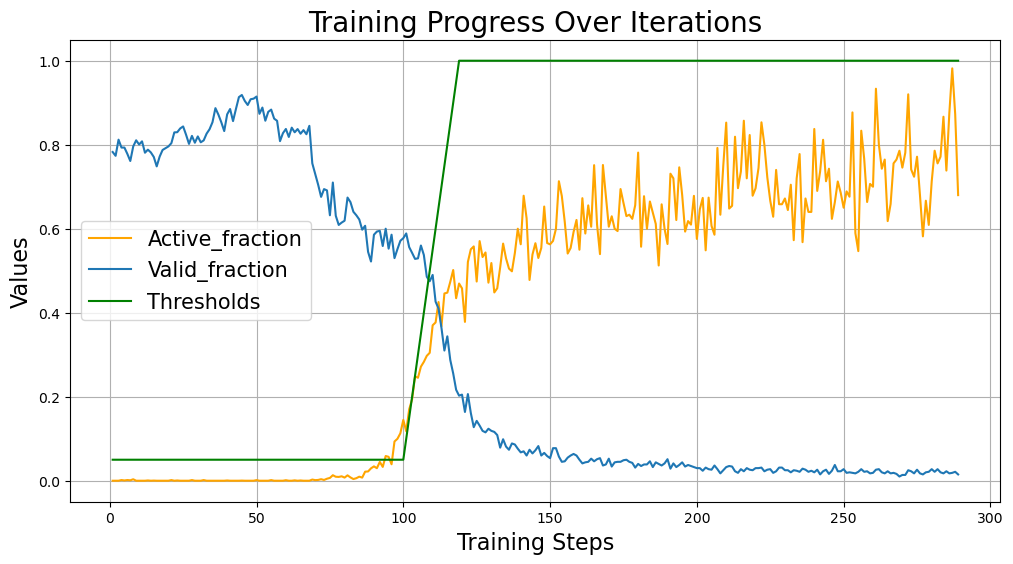

In [7]:
import matplotlib.pyplot as plt
import pandas as pd


df = pd.DataFrame(data)

# Plot the values over the training steps
plt.figure(figsize=(12, 6))

# Plot Mean Value of Predictions
plt.plot(df["Iteration"], df["Active_fraction"], label="Active_fraction", color='orange')

# Plot Proportion of Valid SMILES
plt.plot(df["Iteration"], df["Valid_fraction"], label="Valid_fraction")

# Plot Threshold Increased To
plt.plot(df["Iteration"], df["Thresholds"], label="Thresholds", color='green')

# Add titles and labels with specific font sizes
plt.title("Training Progress Over Iterations", fontsize=20)
plt.xlabel("Training Steps", fontsize=16)
plt.ylabel("Values", fontsize=16)
plt.legend(fontsize=15)
plt.grid(True)
plt.show()


In [13]:
# Assume n_generated_per_iteration is a fixed number of molecules generated per iteration
n_generated_per_iteration = 50  # Replace with actual number if different

# Compute the number of valid molecules at the beginning and end of training
valid_molecules_start = n_generated_per_iteration * df["Proportion_of_valid_SMILES"].iloc[0]
valid_molecules_end = n_generated_per_iteration * df["Proportion_of_valid_SMILES"].iloc[-1]

print(f"Estimated valid molecules at the start of training: {valid_molecules_start}")
print(f"Estimated valid molecules at the end of training: {valid_molecules_end}")


Estimated valid molecules at the start of training: 39.133165829145725
Estimated valid molecules at the end of training: 0.75
